In [11]:
#--------------------------------------------------------
# Blood Pressure
# 0 = Normal
# 1 = Elevated
# 2 = Hypertension Stage 1
# 3 = Hypertension Stage 2

# Cholesterol and Glucose
# 1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'

# Sex
# 0: 'Femmina', 1: 'Maschio'
#--------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/dataset1.csv', encoding='utf8')
df2 = pd.read_csv('data/dataset2.csv', encoding='utf8', sep=';')

df = pd.concat([df1, df2], axis=0)
df = df.loc[:, ~df.T.duplicated()]
df['age_years'] = df['age'] / 365.25
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
df.rename(columns={'ap_hi': 'sistolica', 'ap_lo': 'diastolica'}, inplace=True)
df.drop(columns=['age', 'height'], inplace=True)
df.rename(columns={'age_years': 'age'}, inplace=True)
df.rename(columns={'height_m': 'height'}, inplace=True)
df.rename(columns={'smoke': 'smoker'}, inplace=True) # 0 = no, 1 = sì
df.rename(columns={'alco': 'alcohol_intake'}, inplace=True)
df.rename(columns={'cardio': 'pres_card_dis'}, inplace=True)

def classify_bp(row):
    if 120 <= row['sistolica'] < 130 and row['diastolica'] < 80:
        return 1
    elif row['sistolica'] >= 130 or row['diastolica'] >= 80:
        return 3
    elif row['sistolica'] >= 140 or row['diastolica'] >= 90:
        return 4
    else:
        return 0

df['bp_category'] = df.apply(classify_bp, axis=1)

bp_order = [0, 1, 2, 3]
df['bp_category'] = pd.Categorical(df['bp_category'], categories=bp_order, ordered=True)
df = df.sort_values(by='bp_category')

df.drop(columns=['id'], inplace=True)
df['id'] = range(1, len(df) + 1)

df = df[['id', 'gender', 'age', 'height', 'weight', 'bmi', 'sistolica', 'diastolica', 'bp_category', 'cholesterol', 'gluc', 'smoker', 'alcohol_intake', 'active', 'pres_card_dis']]

df['age'] = df['age'].astype(int)
df['weight'] = df['weight'].astype(int)
df['bmi'] = df['bmi'].round(3)
df['height'] = df['height'].round(2)
df['gender'] = df['gender'].map({1:0, 2:1})
df = df[(df['sistolica'] >= 80) & (df['sistolica'] <= 250) & (df['diastolica'] >= 50) & (df['diastolica'] <= 150)]

display(df)
df.to_csv('data/dataset.csv', encoding='utf8', sep=',', index=False)

,id,gender,age,height,weight,bmi,sistolica,diastolica,bp_category,cholesterol,gluc,smoker,alcohol_intake,active,pres_card_dis
29547,1,1,46,1.70,84,29.066,100,60,0,1,1,1,0,1,0
35074,2,0,43,1.55,113,47.034,110,59,0,2,2,0,0,1,0
57897,3,1,50,1.86,68,19.655,90,70,0,1,1,0,0,1,0
42759,4,1,53,1.78,91,28.721,110,70,0,2,2,0,0,0,1
14751,5,0,55,1.57,79,32.050,110,70,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50744,138201,0,44,1.68,80,28.345,120,80,3,1,1,0,0,0,1
50743,138202,0,47,1.60,74,28.906,160,100,3,1,1,0,0,1,1
50742,138203,0,57,1.60,68,26.562,120,80,3,1,1,0,0,0,0
50775,138204,0,41,1.66,99,35.927,120,80,3,2,1,0,0,1,1


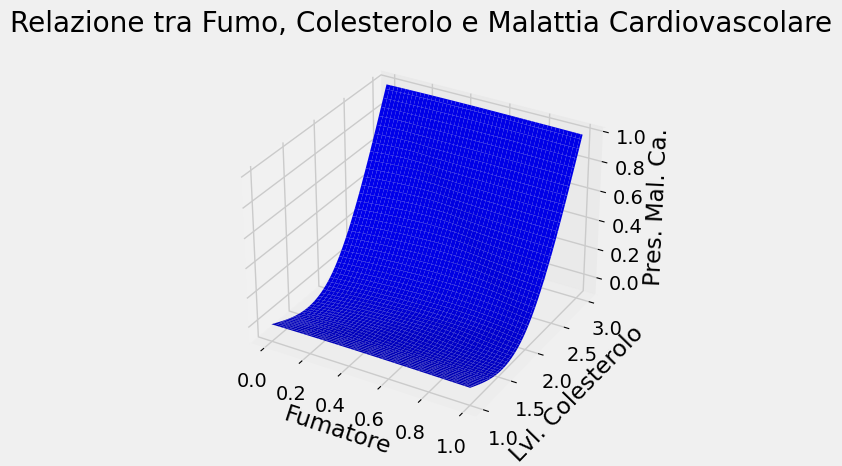

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')
data = pd.read_csv('data/dataset.csv', encoding='utf8')

x = data['smoker'].values # Fumatore: 0 (non fumatore), 1 (fumatore)
y = data['cholesterol'].values # Livelli di colesterolo
z = data['pres_card_dis'].values # Malattia cardiovascolare: 0 (non presente), 1 (presente)

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)

Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

fig = plt.figure(figsize=(40, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xi, Yi, Zi, color='blue')

ax.set_xlabel('Fumatore')
ax.set_ylabel('Lvl. Colesterolo')
ax.set_zlabel('Pres. Mal. Ca.')
plt.title('Relazione tra Fumo, Colesterolo e Malattia Cardiovascolare')

plt.show()

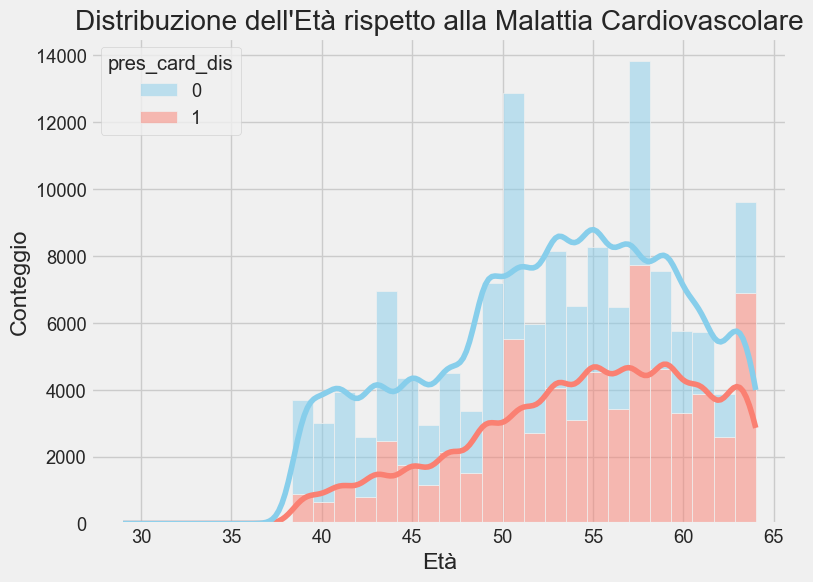

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='pres_card_dis', kde=True, bins=30, multiple='stack', palette=['skyblue', 'salmon'])
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.title('Distribuzione dell\'Età rispetto alla Malattia Cardiovascolare')
plt.show()

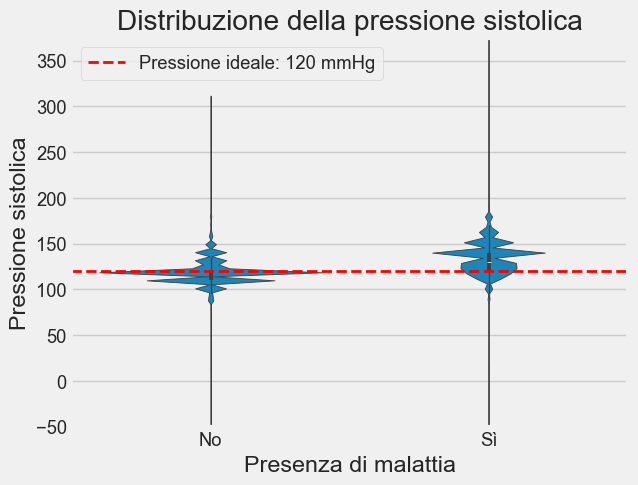

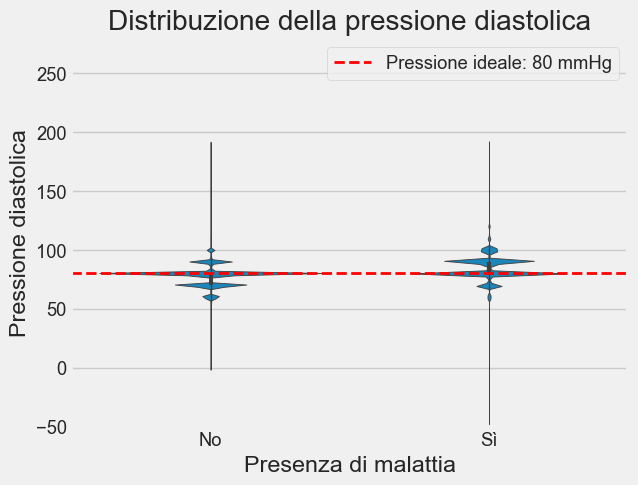

In [145]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
sns.violinplot(data=data, x='pres_card_dis', y='sistolica')
plt.xlabel('Presenza di malattia')
plt.ylabel('Pressione sistolica')
plt.title('Distribuzione della pressione sistolica')
plt.axhline(y=120, color='red', linestyle='--', linewidth=2, label='Pressione ideale: 120 mmHg')
plt.ylim(-50,375)
plt.legend()
plt.show()

sns.violinplot(data=data, x='pres_card_dis', y='diastolica')
plt.xlabel('Presenza di malattia')
plt.ylabel('Pressione diastolica')
plt.title('Distribuzione della pressione diastolica')
plt.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Pressione ideale: 80 mmHg')
plt.ylim(-50, 280)
plt.legend()
plt.show()

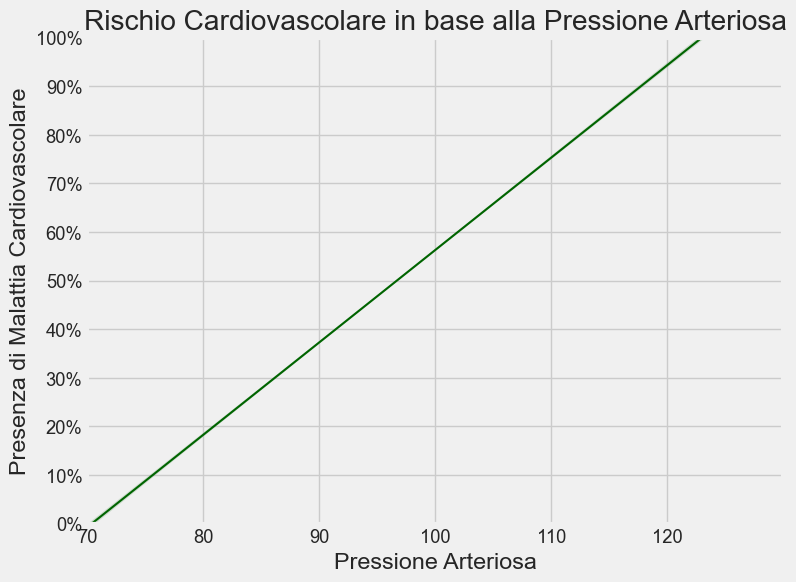

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
data.loc[:, 'blood_pressure'] = (data['diastolica'] * 2 + data['sistolica']) / 3
data = data[data['blood_pressure'] <= 250]

sns.regplot(
    data=data, 
    x='blood_pressure', 
    y='pres_card_dis', 
    scatter=False, 
    color='darkgreen',
    ci=95,
    line_kws={"linewidth": 1.5}
)

plt.xlabel('Pressione Arteriosa')
plt.ylabel('Presenza di Malattia Cardiovascolare')
plt.title('Rischio Cardiovascolare in base alla Pressione Arteriosa')
plt.xlim(70,130)
plt.ylim(0,1)
plt.yticks([i/10 for i in range(0, 11)], [f'{i*10}%' for i in range(0, 11)])
plt.xticks(range(70,130,10))
plt.show()

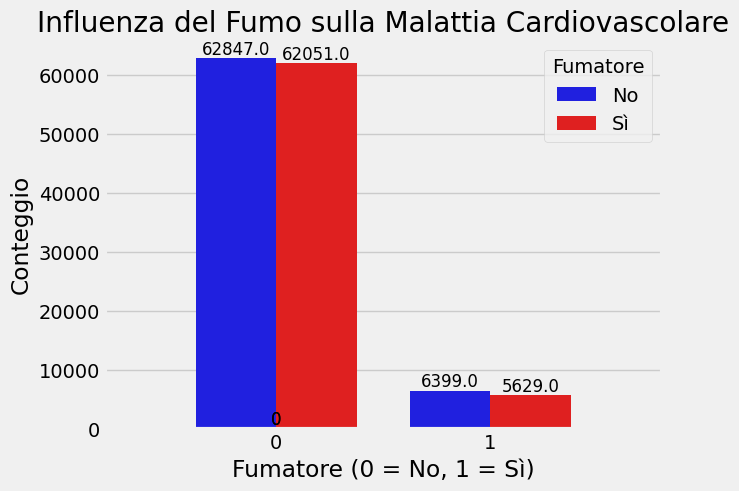

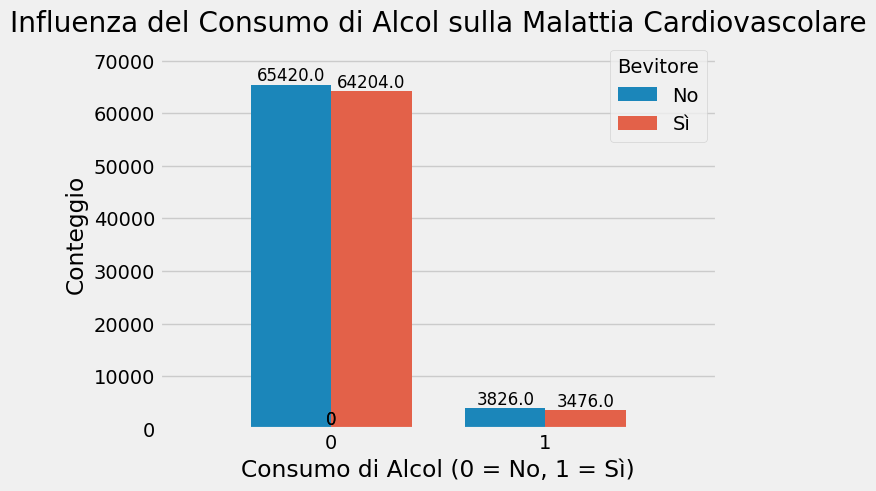

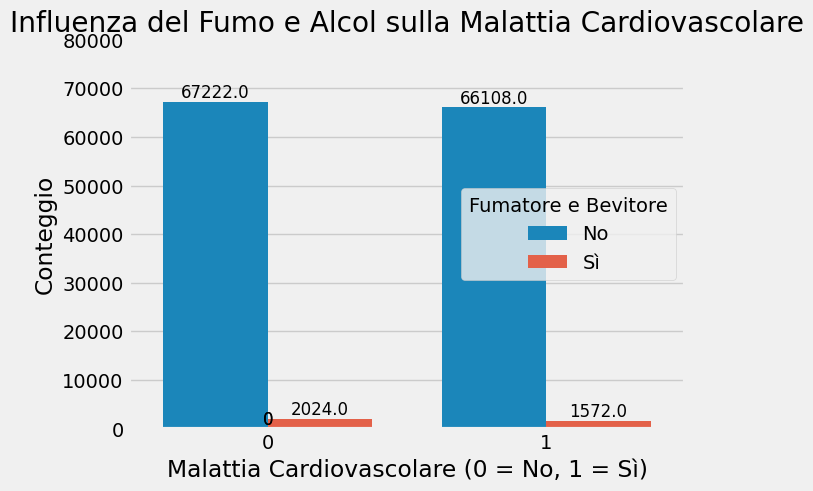

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("coolwarm", as_cmap=True)

plt.style.use('fivethirtyeight')

ax = sns.countplot(data=data, x='smoker', hue='pres_card_dis', width=0.75, palette=['blue', 'red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Fumatore (0 = No, 1 = Sì)')
plt.ylabel('Conteggio')
plt.xlim(-0.8, 1.8)
plt.title('Influenza del Fumo sulla Malattia Cardiovascolare')
plt.legend(title='Fumatore', labels=['No', 'Sì'])
plt.show()

# Blu -> Non fumatori
# Rosso -> Fumatori

bx = sns.countplot(data=data, x='alcohol_intake', hue='pres_card_dis', width=0.75)

for p in bx.patches:
    bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Consumo di Alcol (0 = No, 1 = Sì)')
plt.ylabel('Conteggio')
plt.ylim(0,74000)
plt.xlim(-0.8, 1.8)
plt.title('Influenza del Consumo di Alcol sulla Malattia Cardiovascolare')
plt.legend(title='Bevitore', labels=['No', 'Sì'])
plt.show()

# Blu -> Non alcolici
# Rosso -> Alcolici

data['smoker_alcohol'] = (data['smoker'] & data['alcohol_intake']).astype(int)

cx = sns.countplot(data=data, x='pres_card_dis', hue='smoker_alcohol', width=0.75)

for p in cx.patches:
    cx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 2), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Malattia Cardiovascolare (0 = No, 1 = Sì)')
plt.ylabel('Conteggio')
plt.title('Influenza del Fumo e Alcol sulla Malattia Cardiovascolare')
plt.legend(title='Fumatore e Bevitore', labels=['No', 'Sì'])
plt.ylim(0, 80000)
plt.show()

C:\Users\Plantos Dan Stefan\AppData\Local\Temp\ipykernel_12152\3621823893.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genere')


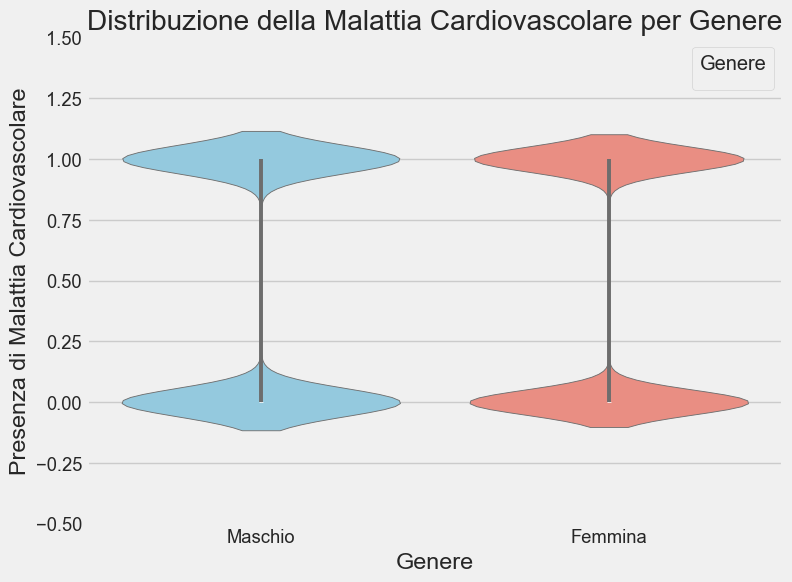

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
data['gender_label'] = data['gender'].map({0: 'Femmina', 1: 'Maschio'})
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='gender_label', y='pres_card_dis', hue='gender_label', palette=['skyblue', 'salmon'], legend=False)
plt.xlabel('Genere')
plt.ylabel('Presenza di Malattia Cardiovascolare')
plt.title('Distribuzione della Malattia Cardiovascolare per Genere')
plt.legend(title='Genere')
plt.ylim(-0.5, 1.5)
plt.show()

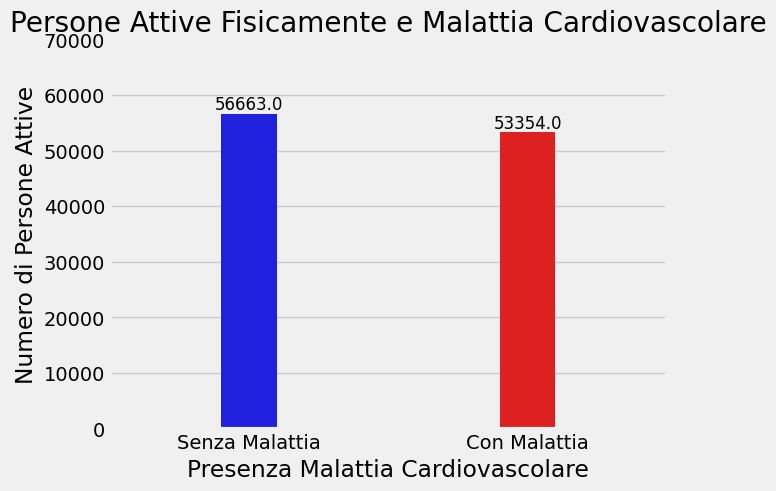

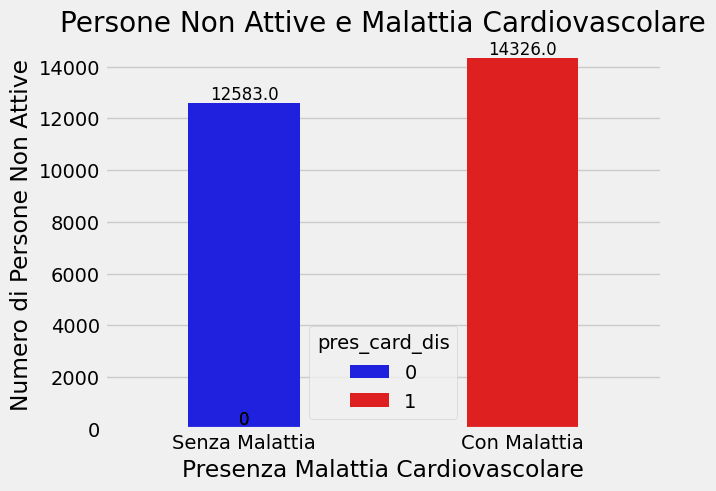

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
sns.color_palette("coolwarm", as_cmap=True)
plt.style.use('fivethirtyeight')
data_active = data[data['active'] == 1]
ax = sns.countplot(data=data_active, x='pres_card_dis', hue='pres_card_dis', width=0.2, legend=False, palette=['blue', 'red'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 2),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Presenza Malattia Cardiovascolare')
plt.ylabel('Numero di Persone Attive')
plt.ylim(0,70000)
plt.title('Persone Attive Fisicamente e Malattia Cardiovascolare')
plt.xticks([0, 1], ['Senza Malattia', 'Con Malattia'])
plt.show()

data_non_active = data[data['active'] == 0]
ax = sns.countplot(data=data_non_active, x='pres_card_dis', hue='pres_card_dis', palette=['blue', 'red'], width=0.4)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 2), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Presenza Malattia Cardiovascolare')
plt.ylabel('Numero di Persone Non Attive')
plt.title('Persone Non Attive e Malattia Cardiovascolare')
plt.xticks([0, 1], ['Senza Malattia', 'Con Malattia'])
plt.show()

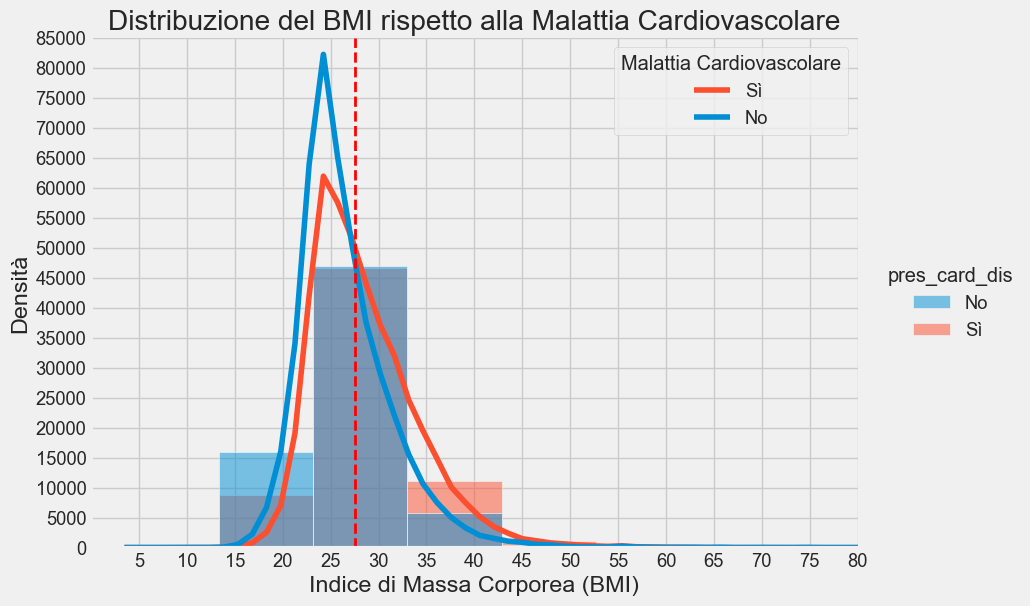

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("coolwarm", as_cmap=True)
g = sns.displot(data=data, x='bmi', hue='pres_card_dis', bins=30, kde=True, height=6, aspect=1.5)
plt.xticks(range(5, 85, 5))
plt.yticks(range(0,90000,5000))
g.set_axis_labels('Indice di Massa Corporea (BMI)', 'Densità')
plt.title('Distribuzione del BMI rispetto alla Malattia Cardiovascolare')
plt.xlim(0,65)
plt.ylim(0,85000)
plt.legend(title='Malattia Cardiovascolare', labels=['Sì', 'No'])
mean_bmi = data['bmi'].mean()
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Media BMI: {mean_bmi:.2f}')
plt.xticks(range(5, 85, 5), [f'{i}' for i in range(5, 85, 5)])
plt.show()

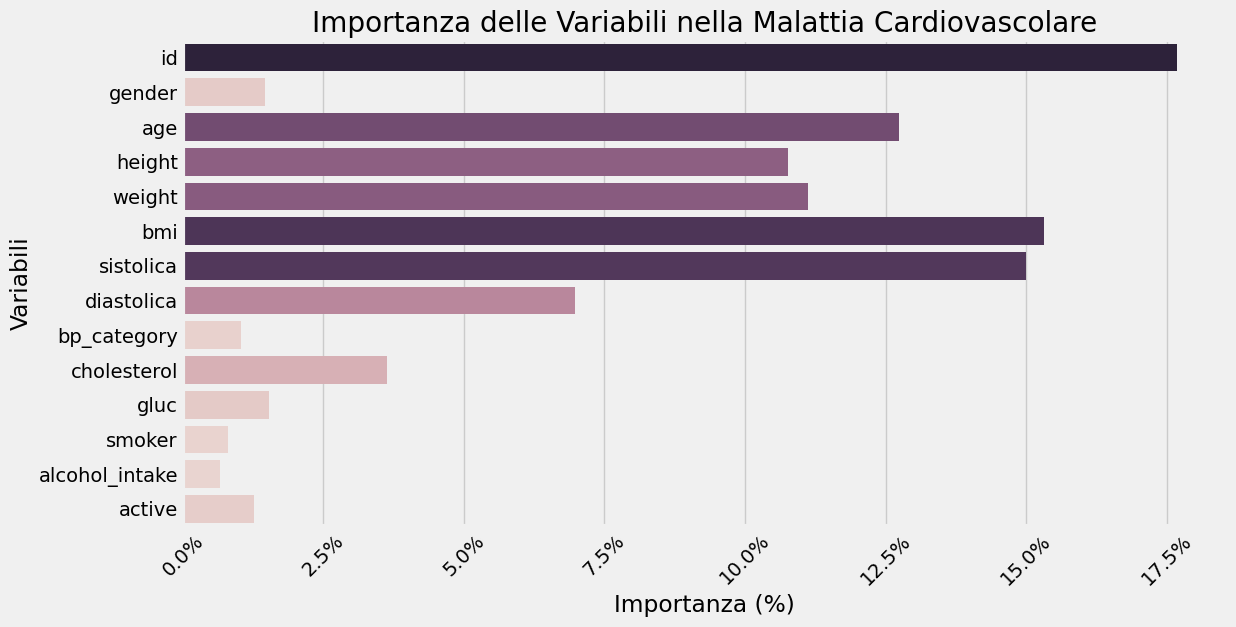

In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
X, y = data.drop(columns=['pres_card_dis']), data['pres_card_dis']
model = RandomForestClassifier(random_state=42).fit(X, y)
plt.figure(figsize=(12, 6))
sns.barplot(y=X.columns, x=model.feature_importances_ * 100, hue=model.feature_importances_ * 100, legend=False)
plt.xlabel('Importanza (%)')
plt.ylabel('Variabili')
plt.title('Importanza delle Variabili nella Malattia Cardiovascolare')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

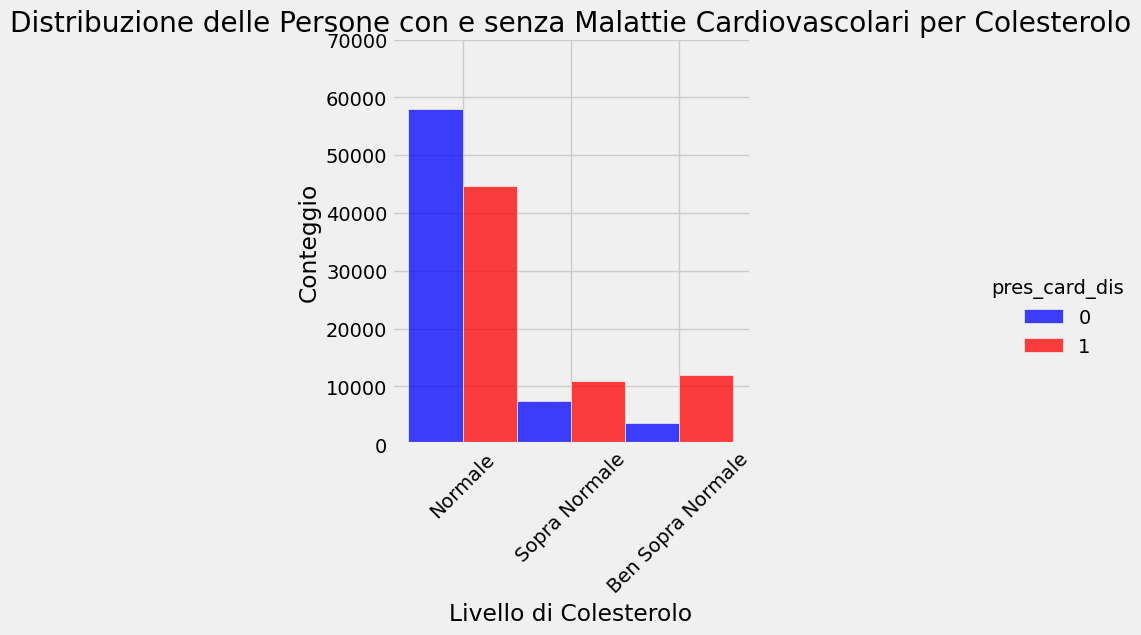

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/dataset.csv', encoding='utf8')
plt.style.use('fivethirtyeight')
sns.color_palette("coolwarm", as_cmap=True)
g = sns.displot(data=data, x='cholesterol', hue='pres_card_dis', discrete=True, multiple='dodge', bins=3, palette=['blue', 'red'])
plt.xticks([1, 2, 3], ['Normale', 'Sopra Normale', 'Ben Sopra Normale'])
g.set_axis_labels('Livello di Colesterolo', 'Conteggio')
plt.title('Distribuzione delle Persone con e senza Malattie Cardiovascolari per Colesterolo')
plt.ylim(0,70000)
plt.xticks(rotation=45)
plt.show()

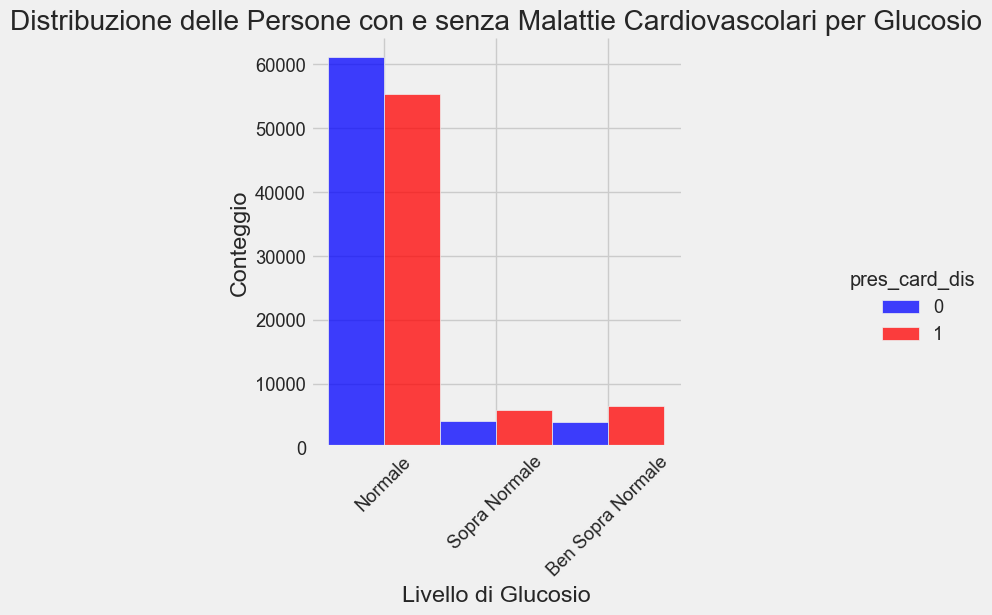

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
sns.color_palette("coolwarm", as_cmap=True)
g = sns.displot(data=data, x='gluc', hue='pres_card_dis', discrete=True, multiple='dodge', bins=3, palette=['blue', 'red'])
plt.xticks([1, 2, 3], ['Normale', 'Sopra Normale', 'Ben Sopra Normale'])
g.set_axis_labels('Livello di Glucosio', 'Conteggio')
plt.title('Distribuzione delle Persone con e senza Malattie Cardiovascolari per Glucosio')
plt.xticks(rotation=45)
plt.show()

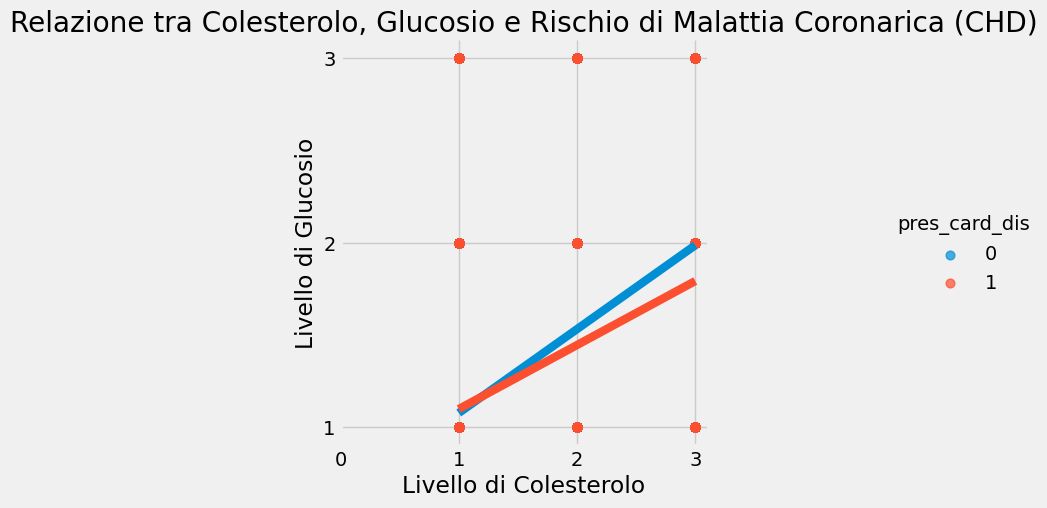

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/dataset.csv', encoding='utf8')
plt.style.use('fivethirtyeight')
sns.lmplot(data=data, x='cholesterol', y='gluc', hue='pres_card_dis', ci=95, scatter_kws={'s': 40, 'alpha': 0.7})
plt.xlabel('Livello di Colesterolo')
plt.ylabel('Livello di Glucosio')
plt.title('Relazione tra Colesterolo, Glucosio e Rischio di Malattia Coronarica (CHD)')
plt.xticks(range(0,4,1))
plt.yticks(range(1,4,1))
plt.show()

# Cholesterol and Glucose
# 1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'